#**EDA AND DATASET INSIGHTS**

In [476]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

%matplotlib inline

In [477]:
data = '/content/Rotten_Tomatoes_Movies3.xls'
df = pd.read_excel(data)

In [478]:
df.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [479]:
df.shape

(16638, 16)

In [480]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [481]:
df.duplicated().sum()

1

In [482]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
8495,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0


In [483]:
df.drop_duplicates(inplace = True)

In [484]:
df.duplicated().sum()

0

In [485]:
df.shape

(16637, 16)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16637 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16637 non-null  object        
 1   movie_info          16613 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16637 non-null  object        
 4   genre               16620 non-null  object        
 5   directors           16523 non-null  object        
 6   writers             15288 non-null  object        
 7   cast                16353 non-null  object        
 8   in_theaters_date    15822 non-null  datetime64[ns]
 9   on_streaming_date   16635 non-null  datetime64[ns]
 10  runtime_in_minutes  16482 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16637 non-null  object        
 13  tomatometer_rating  16637 non-null  int64         


In [487]:
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8328
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [488]:
df['rating'].value_counts()

,count
rating,
R,6136
NR,4861
PG-13,2885
PG,2062
G,652
NC17,37
PG-13),3
R),1


In [489]:
df["rating"] = df["rating"].str.replace(r"\)$", "", regex=True)

In [490]:
df['rating'].value_counts()

,count
rating,
R,6137
NR,4861
PG-13,2888
PG,2062
G,652
NC17,37


In [491]:
df['studio_name'].value_counts()

,count
studio_name,
Paramount Pictures,497
Warner Bros. Pictures,492
Universal Pictures,469
20th Century Fox,414
IFC Films,398
...,...
Lucky Hat Entertainment,1
Pale Griot Films,1
Roadside Attractions/Asgaard,1


In [492]:
df['tomatometer_status'].value_counts()

,count
tomatometer_status,
Rotten,7233
Fresh,6447
Certified Fresh,2957


In [493]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15822,16635,16482.000000,16637.000000,16637.000000,16385.00000
mean,1999-10-24 12:27:23.686006784,2008-08-13 08:55:24.075743744,102.392367,60.464146,56.609966,60.47159
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.00000
25%,1993-03-27 12:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.00000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.00000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.00000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.00000
std,NaN,NaN,25.028519,28.586446,66.384769,20.46276


In [494]:
df.nunique()

,0
movie_title,16106
movie_info,16613
critics_consensus,8307
rating,6
genre,1080
directors,8314
writers,12121
cast,16326
in_theaters_date,5586
on_streaming_date,2260


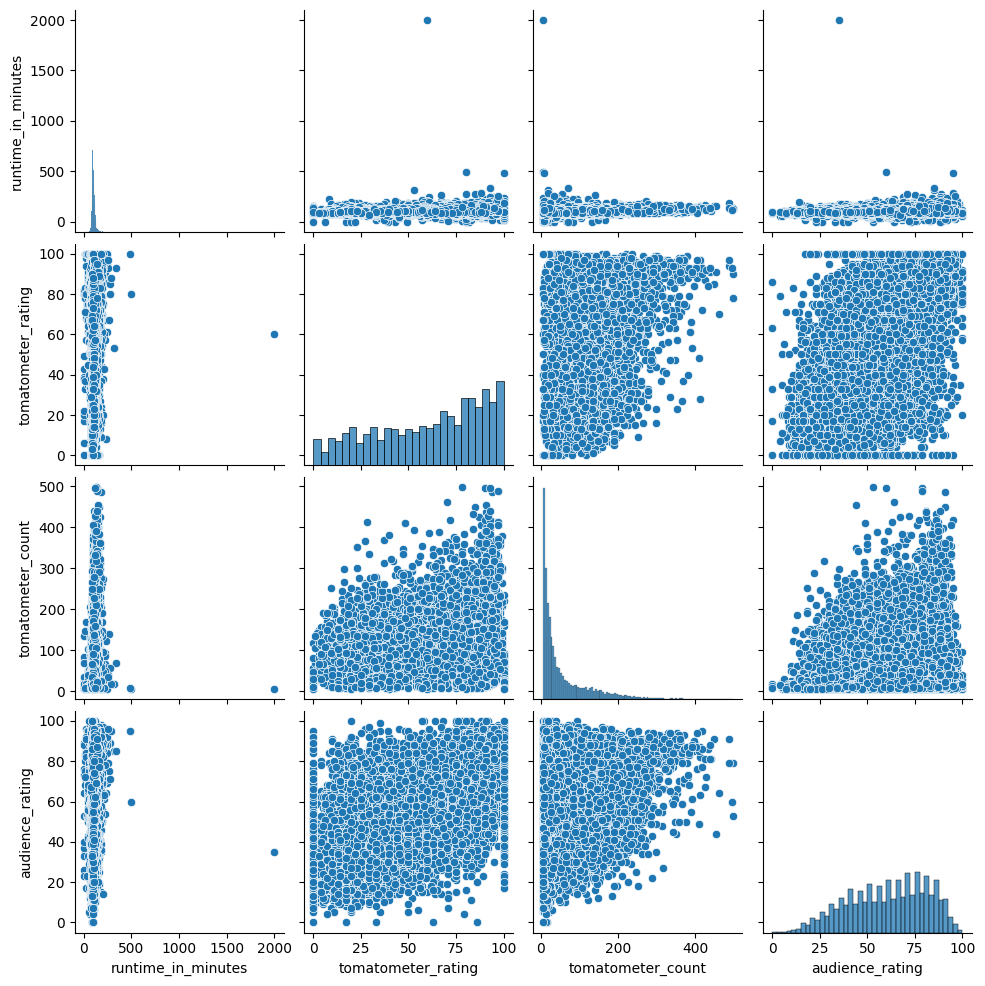

In [495]:
sns.pairplot(data = df)

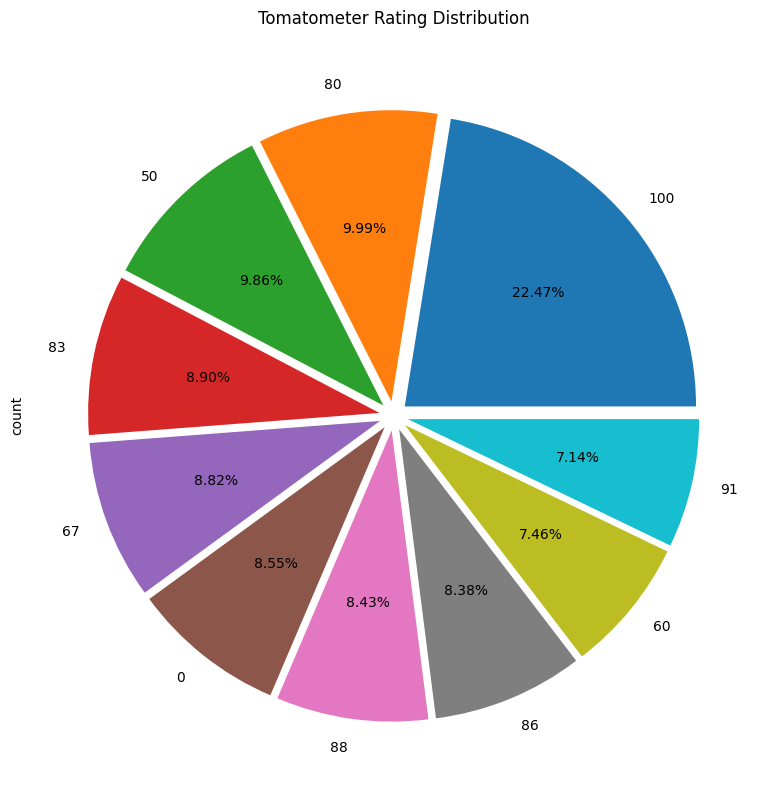

In [496]:
fig, ax = plt.subplots(figsize=(10, 8))
explode = (0.05,) * 10
df['tomatometer_rating'].value_counts(ascending=False).head(10).plot.pie(autopct="%0.2f%%", explode=explode,ax=ax)
plt.title('Tomatometer Rating Distribution', pad=20)
plt.tight_layout()

plt.show()

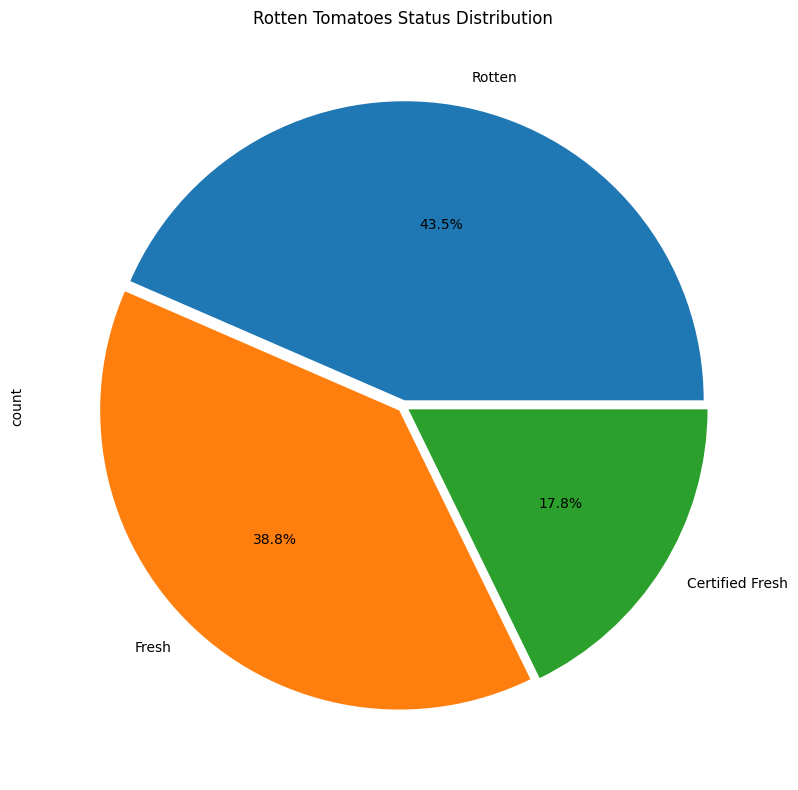

In [497]:
plt.figure(figsize=(10, 8))
df['tomatometer_status'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.02, 0.02, 0.02],title='Rotten Tomatoes Status Distribution')
plt.tight_layout()
plt.show()

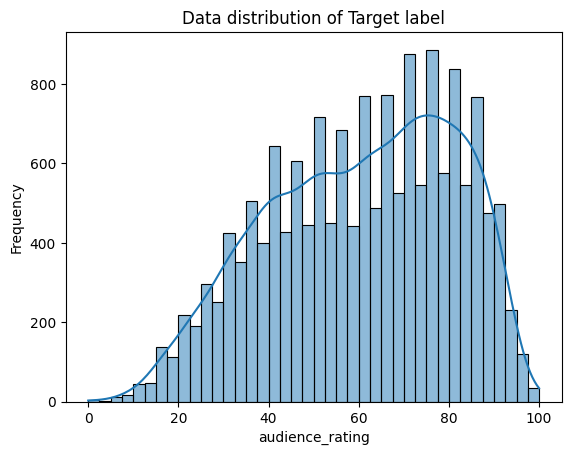

In [498]:
sns.histplot(df['audience_rating'],bins = 'auto', kde = True)
plt.title('Data distribution of Target label')
plt.xlabel('audience_rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-499-644318bb300b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')


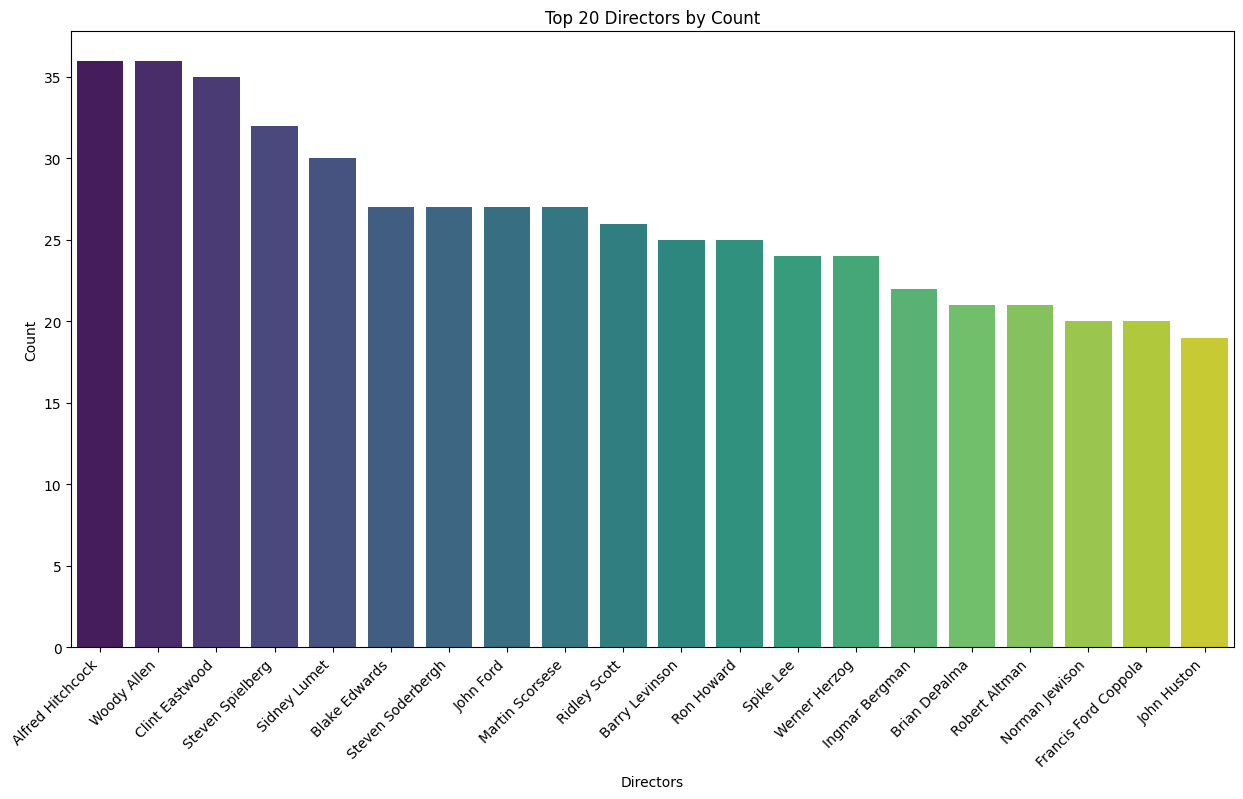

In [499]:
top_directors = df['directors'].value_counts().head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 20 Directors by Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# **DATA PREPROCESSING**

In [500]:
df = df.dropna()

In [501]:
df.isnull().sum()

,0
movie_title,0
movie_info,0
critics_consensus,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0


In [502]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()

<ipython-input-502-de29fedc3105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].str.split(',')


In [503]:
df['genre'].unique()

array(['Action & Adventure', 'Comedy', 'Drama',
       'Science Fiction & Fantasy', 'Classics', 'Kids & Family',
       'Mystery & Suspense', 'Romance', 'Art House & International',
       'Faith & Spirituality', 'Documentary', 'Special Interest',
       'Horror', 'Animation', 'Western', 'Sports & Fitness',
       'Musical & Performing Arts', 'Television', 'Cult Movies',
       'Anime & Manga', 'Gay & Lesbian'], dtype=object)

In [504]:
df = pd.get_dummies(df, columns=['genre'],prefix='genre', drop_first=False)
genre_columns = [col for col in df.columns if col.startswith('genre_')]
df[genre_columns] = df[genre_columns].astype(int)

In [505]:
columns = df.columns.tolist()
desired_order = ['movie_title', 'movie_info', 'rating'] + [col for col in columns if 'genre_' in col] + ['directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']
df = df[desired_order]
df = df.reset_index(drop=True)
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'],errors='coerce')

In [506]:
cols = ['rating','tomatometer_status']
le = LabelEncoder()
for c in cols:
  df[c] = le.fit_transform(df[c])

In [507]:
mean_target = df.groupby('studio_name')['audience_rating'].mean()
df['studio_name'] = df['studio_name'].map(mean_target)

In [508]:
df['directors'] = df['directors'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df['writers'] = df['writers'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df['cast'] = df['cast'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

In [509]:
mean_target = df.explode('directors').groupby('directors')['audience_rating'].mean()
df['directors'] = df['directors'].apply(lambda x: sum(mean_target[val] for val in x) / len(x))

In [510]:
mean_target = df.explode('writers').groupby('writers')['audience_rating'].mean()
df['writers'] = df['writers'].apply(lambda x: sum(mean_target[val] for val in x) / len(x))

In [511]:
mean_target = df.explode('cast').groupby('cast')['audience_rating'].mean()
df['cast'] = df['cast'].apply(lambda x: sum(mean_target[val] for val in x) / len(x))

In [512]:
# Create new columns
df['in_theater_year'] = df['in_theaters_date'].dt.year
df['in_theater_month'] = df['in_theaters_date'].dt.month
df['in_theater_day'] = df['in_theaters_date'].dt.day
df['in_theater_weekday'] = df['in_theaters_date'].dt.weekday  # Monday=0, Sunday=6

df['on_streaming_year'] = df['on_streaming_date'].dt.year
df['on_streaming_month'] = df['on_streaming_date'].dt.month
df['on_streaming_day'] = df['on_streaming_date'].dt.day
df['on_streaming_weekday'] = df['on_streaming_date'].dt.weekday

df = df.drop(columns=['in_theaters_date', 'on_streaming_date'])
columns = df.columns.to_list()


cast_idx = columns.index('cast')
runtime_idx = columns.index('runtime_in_minutes')

new_columns = ['in_theater_year', 'in_theater_month', 'in_theater_day', 'in_theater_weekday',
               'on_streaming_year', 'on_streaming_month', 'on_streaming_day', 'on_streaming_weekday']


for col in reversed(new_columns):
    columns.insert(cast_idx + 1, col)

columns = list(dict.fromkeys(columns))
df = df[columns]

In [513]:
df

,movie_title,movie_info,rating,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,on_streaming_year,on_streaming_month,on_streaming_day,on_streaming_weekday,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,3,1,0,0,0,0,0,0,...,2010,6,29,1,83.0,61.768229,2,49,144,53.0
1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,3,0,0,0,0,0,1,0,...,2010,6,29,1,83.0,61.768229,2,49,144,53.0
2,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,3,0,0,0,0,0,0,0,...,2010,6,29,1,83.0,61.768229,2,49,144,53.0
3,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,3,0,0,0,0,0,0,0,...,2010,6,29,1,83.0,61.768229,2,49,144,53.0
4,Please Give,Kate has a lot on her mind. There's the ethics...,5,0,0,0,0,0,1,0,...,2010,10,19,1,90.0,72.065440,0,86,140,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,Zoom,Former superhero Jack is called back to work t...,3,0,0,0,0,0,1,0,...,2007,9,2,6,88.0,57.250000,2,3,66,33.0
16880,Zoom,Former superhero Jack is called back to work t...,3,0,0,0,0,0,0,0,...,2007,9,2,6,88.0,57.250000,2,3,66,33.0
16881,Zootopia,The modern mammal metropolis of Zootopia is a ...,3,1,0,0,0,0,0,0,...,2016,6,7,1,108.0,76.571429,0,97,279,92.0
16882,Zootopia,The modern mammal metropolis of Zootopia is a ...,3,0,1,0,0,0,0,0,...,2016,6,7,1,108.0,76.571429,0,97,279,92.0


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16884 entries, 0 to 16883
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_title                      16884 non-null  object 
 1   movie_info                       16884 non-null  object 
 2   rating                           16884 non-null  int64  
 3   genre_Action & Adventure         16884 non-null  int64  
 4   genre_Animation                  16884 non-null  int64  
 5   genre_Anime & Manga              16884 non-null  int64  
 6   genre_Art House & International  16884 non-null  int64  
 7   genre_Classics                   16884 non-null  int64  
 8   genre_Comedy                     16884 non-null  int64  
 9   genre_Cult Movies                16884 non-null  int64  
 10  genre_Documentary                16884 non-null  int64  
 11  genre_Drama                      16884 non-null  int64  
 12  genre_Faith & Spir

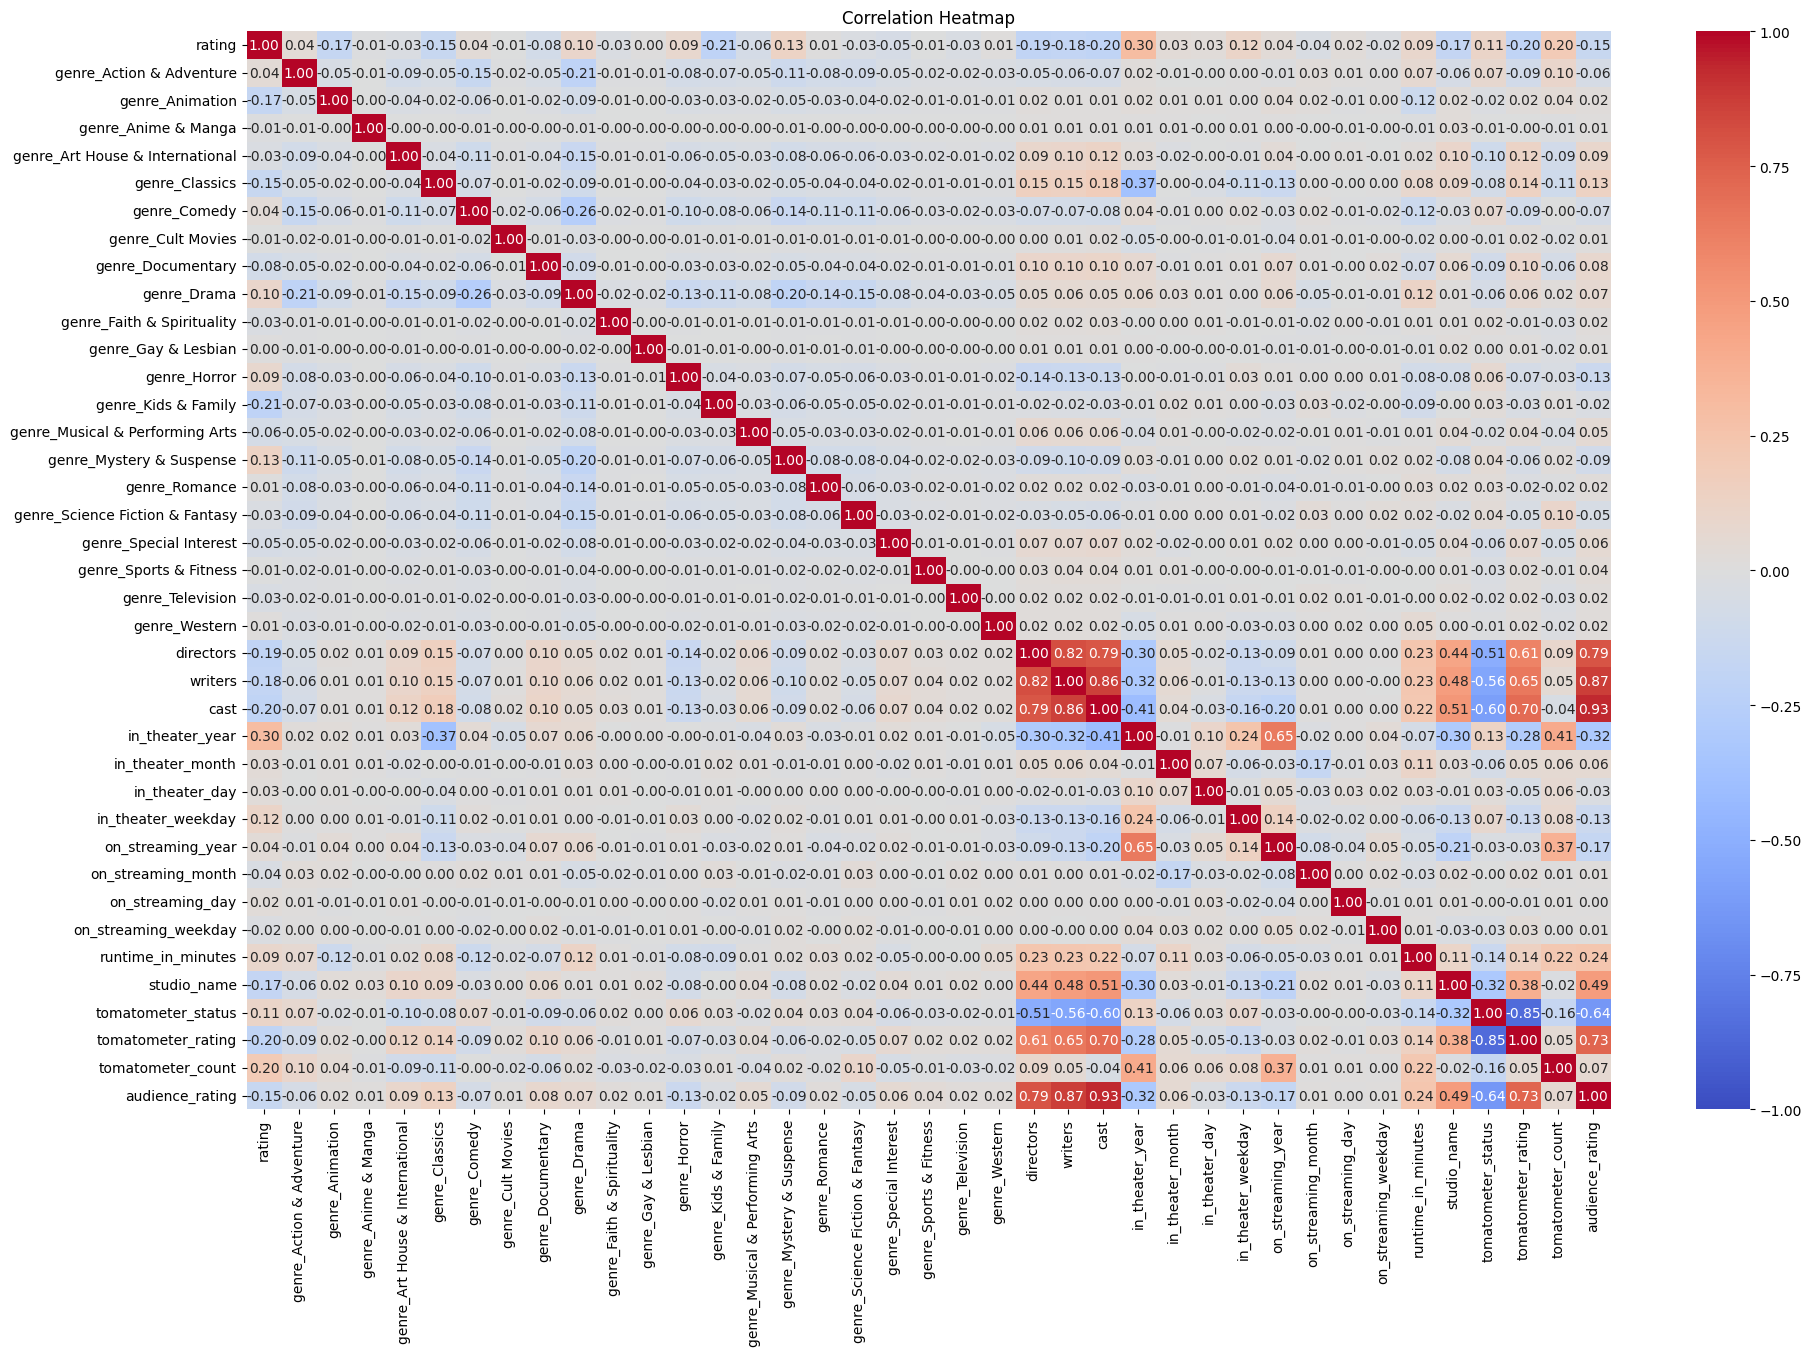

In [515]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(22, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [516]:
X = df.drop(columns = ['movie_title','movie_info','audience_rating'])
y = df['audience_rating']

In [517]:
X.head(5)

,rating,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,genre_Documentary,genre_Drama,...,in_theater_weekday,on_streaming_year,on_streaming_month,on_streaming_day,on_streaming_weekday,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count
0,3,1,0,0,0,0,0,0,0,0,...,4,2010,6,29,1,83.0,61.768229,2,49,144
1,3,0,0,0,0,0,1,0,0,0,...,4,2010,6,29,1,83.0,61.768229,2,49,144
2,3,0,0,0,0,0,0,0,0,1,...,4,2010,6,29,1,83.0,61.768229,2,49,144
3,3,0,0,0,0,0,0,0,0,0,...,4,2010,6,29,1,83.0,61.768229,2,49,144
4,5,0,0,0,0,0,1,0,0,0,...,4,2010,10,19,1,90.0,72.065440,0,86,140


In [518]:
y.head(5)

,audience_rating
0,53.0
1,53.0
2,53.0
3,53.0
4,64.0


In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13507, 38) (3377, 38) (13507,) (3377,)


In [520]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#**ML Models**



## **Linear regression with cross validation**

Evaluation Metrics used
*   RMSE
*   R-squared




In [521]:
fold_results_lr_mse = []
fold_results_lr_rmse = []
fold_results_lr_r2 = []

for train_idx, val_idx in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_cv, y_train_cv)

    # Predictions for validation set
    val_preds_lr = lr_model.predict(X_val_cv)

    mse_lr = mean_squared_error(y_val_cv, val_preds_lr)
    rmse_lr = np.sqrt(mse_lr)
    r2_lr = lr_model.score(X_val_cv, y_val_cv)

    fold_results_lr_mse.append(mse_lr)
    fold_results_lr_rmse.append(rmse_lr)
    fold_results_lr_r2.append(r2_lr)


mean_mse_lr = np.mean(fold_results_lr_mse)
mean_rmse_lr = np.mean(fold_results_lr_rmse)
mean_r2_lr = np.mean(fold_results_lr_r2)

# Final training on the full dataset
final_lr_model = LinearRegression()
final_lr_model.fit(X_train, y_train)


test_preds_lr = final_lr_model.predict(X_test)
test_mse_lr = mean_squared_error(y_test, test_preds_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = final_lr_model.score(X_test, y_test)


print(f"Mean Cross-Validation RMSE (Linear Regression): {mean_rmse_lr}")
print(f"Mean Cross-Validation R² (Linear Regression): {mean_r2_lr}")
print("-" * 100)
print(f"Final Test RMSE (Linear Regression): {test_rmse_lr}")
print(f"Final Test R² (Linear Regression): {test_r2_lr}")

Mean Cross-Validation RMSE (Linear Regression): 5.910977522867131
Mean Cross-Validation R² (Linear Regression): 0.9096577355517264
----------------------------------------------------------------------------------------------------
Final Test RMSE (Linear Regression): 5.807632185412934
Final Test R² (Linear Regression): 0.909493688984307


## **Random Forest Regressor with cross validation**

Evaluation Metrics used
*   RMSE
*   R-squared

In [522]:
fold_results_rf_mse = []
fold_results_rf_rmse = []
fold_results_rf_r2 = []

for train_idx, val_idx in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model
    rf_model = RandomForestRegressor(random_state=42,max_depth=9,min_samples_split=5,min_samples_leaf=2)
    rf_model.fit(X_train_cv, y_train_cv)

    # Predictions for validation set
    val_preds_rf = rf_model.predict(X_val_cv)

    mse_rf = mean_squared_error(y_val_cv, val_preds_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = rf_model.score(X_val_cv, y_val_cv)

    fold_results_rf_mse.append(mse_rf)
    fold_results_rf_rmse.append(rmse_rf)
    fold_results_rf_r2.append(r2_rf)


mean_mse_rf = np.mean(fold_results_rf_mse)
mean_rmse_rf = np.mean(fold_results_rf_rmse)
mean_r2_rf = np.mean(fold_results_rf_r2)

# Final training on the full dataset
final_rf_model = RandomForestRegressor(random_state=42,max_depth=9,min_samples_split=5,min_samples_leaf=2)
final_rf_model.fit(X_train, y_train)


test_preds_rf = final_rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, test_preds_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = final_rf_model.score(X_test, y_test)

print(f"Mean Cross-Validation RMSE (Random Forest): {mean_rmse_rf}")
print(f"Mean Cross-Validation R² (Random Forest): {mean_r2_rf}")
print("-" * 100)
print(f"Final Test RMSE (Random Forest): {test_rmse_rf}")
print(f"Final Test R² (Random Forest): {test_r2_rf}")

Mean Cross-Validation RMSE (Random Forest): 4.115999297021572
Mean Cross-Validation R² (Random Forest): 0.9561918121754817
----------------------------------------------------------------------------------------------------
Final Test RMSE (Random Forest): 3.9530756946876227
Final Test R² (Random Forest): 0.9580674843529217


# **Model Evaluation and Performance Comparison**

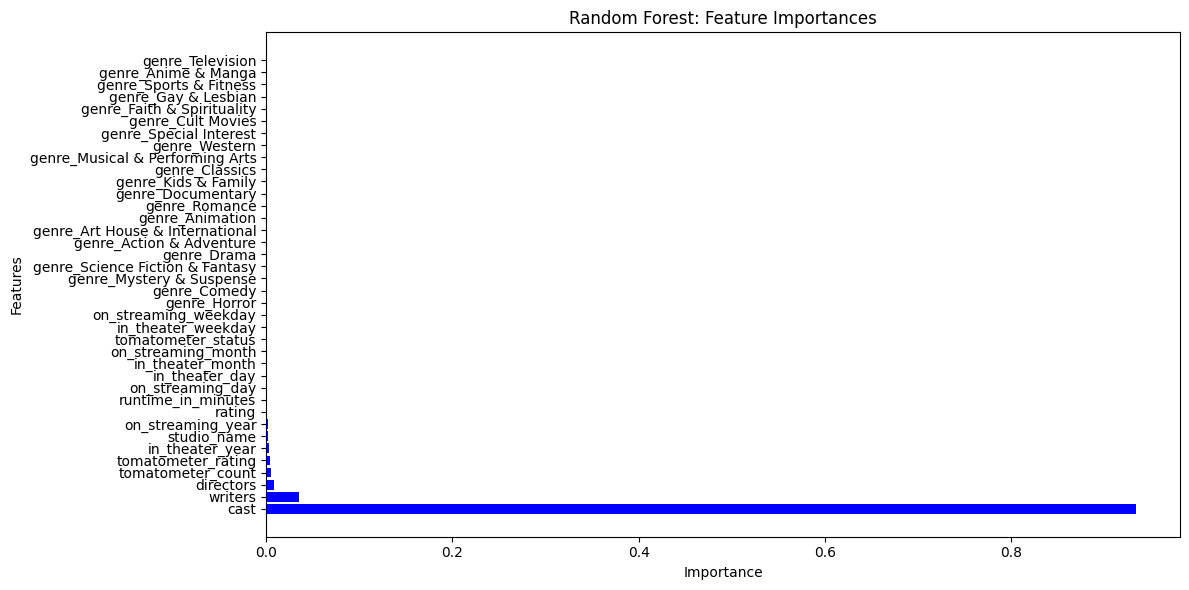

In [523]:
importances_rf = final_rf_model.feature_importances_
feature_names = X_train.columns
indices = importances_rf.argsort()[::-1]

plt.figure(figsize=(12,6))
plt.barh(feature_names[indices], importances_rf[indices], color='blue')
plt.title('Random Forest: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

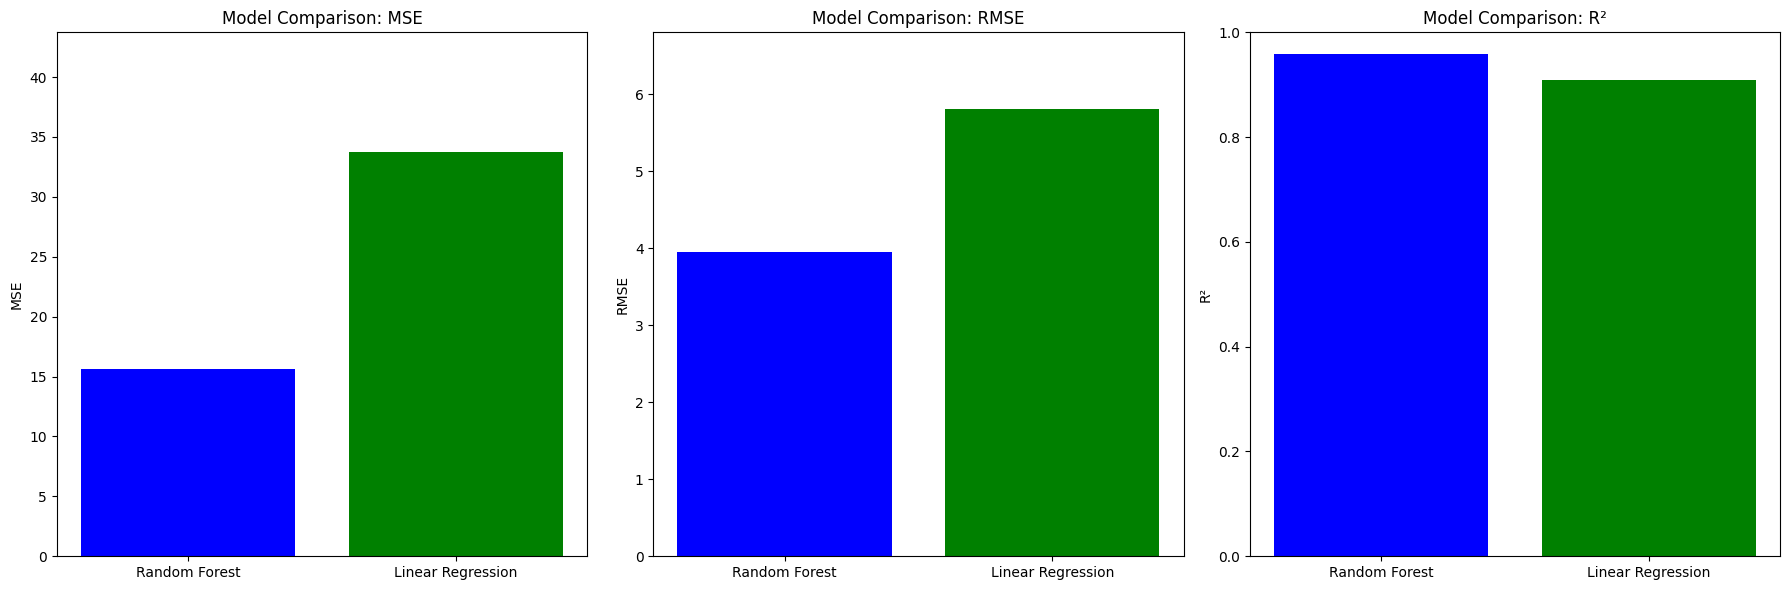

In [524]:
models = ['Random Forest', 'Linear Regression']
metrics = [test_mse_rf, test_mse_lr], [test_rmse_rf, test_rmse_lr], [test_r2_rf, test_r2_lr]
titles = ['MSE', 'RMSE', 'R²']
ylims = [(0, max(test_mse_rf, test_mse_lr) + 10), (0, max(test_rmse_rf, test_rmse_lr) + 1), (0, 1)]
colors = ['blue', 'green']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric, title, ylim in zip(axes, metrics, titles, ylims):
    ax.bar(models, metric, color=colors)
    ax.set_title(f'Model Comparison: {title}')
    ax.set_ylabel(title)
    ax.set_ylim(ylim)

plt.tight_layout()
plt.show()


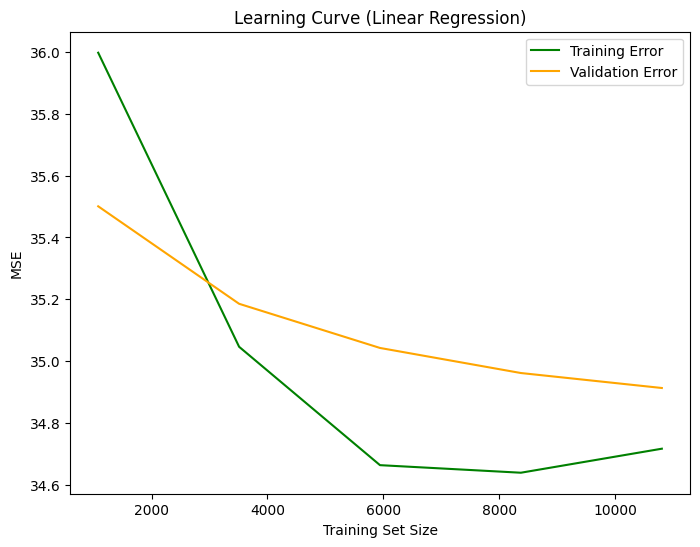

In [525]:
train_sizes_lr, train_scores_lr, val_scores_lr = learning_curve(final_lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_errors_lr = -train_scores_lr.mean(axis=1)
val_errors_lr = -val_scores_lr.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_lr, train_errors_lr, label='Training Error', color='green')
plt.plot(train_sizes_lr, val_errors_lr, label='Validation Error', color='orange')
plt.title('Learning Curve (Linear Regression)')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

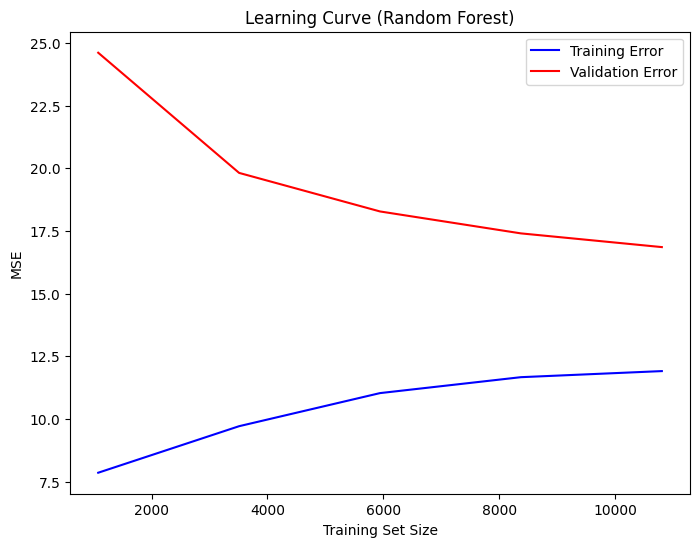

In [526]:
train_sizes, train_scores, val_scores = learning_curve(final_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue')
plt.plot(train_sizes, val_errors, label='Validation Error', color='red')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

Overall our random forest regressor model performs better than linear regression for predicting audience_rating